In [16]:
import pandas as pd
import numpy as np
df = pd.read_csv('cancer_reg.csv',encoding="ISO-8859-1")

In [17]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [19]:
df.shape

(3047, 34)

In [20]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [21]:
## Data Preprocessing for base modelling.

In [22]:
# binnedInc: Median income per capita binned by decile

d = []

for j in range(0, len(df['binnedInc'])):
    a = df['binnedInc'][j][1:-1]
    b = a.split(',')
    sum = 0
    for i in range(len(b)):
        sum =  sum + float((float(b[i]) - 1))
    avg = sum/ len(b)
    d.append(avg)

df['binnedInc_avg'] = d

In [23]:
df['binnedInc_avg'].head()

0    93563.75
1    49533.00
2    49533.00
3    43961.70
4    49533.00
Name: binnedInc_avg, dtype: float64

In [24]:
df = df.drop('binnedInc', axis=1)
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'Geography', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'binnedInc_avg'],
      dtype='object')

In [25]:
# Geography: County name 
# These are all string. Let's see if all the values are unique or all are different

df['Geography'].nunique()

# df['Geography'].nunique() = df.shape for rows. So, it's not worth taking as all the rows will have a unique identity with it.

3047

In [26]:
df = df.drop('Geography', axis=1)
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'binnedInc_avg'],
      dtype='object')

In [27]:
## Now we need to remove the null values to make our base OLS model. Other wise we won't be able to make our model

## Complete info about null values.

null_columns=df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())
print('Shape of dataframe: ',df.shape)

PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64
Shape of dataframe:  (3047, 33)


In [28]:
## There are 2285 null values out of 3047 data points so it is not feasible to replace these null values.
## We can drop these.

df = df.drop('PctSomeCol18_24', axis=1)


In [29]:
# PctEmployed16_Over: Percent of county residents ages 16 and over employed
# PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

print('percentage of Null values in PctEmployed16_Over : ', (152/3047)*100 )
print('percentage of Null values in PctPrivateCoverageAlone : ', (609/3047)*100 )

percentage of Null values in PctEmployed16_Over :  4.98851329176239
percentage of Null values in PctPrivateCoverageAlone :  19.986872333442733


In [79]:
## These are very low percentage of null values we can easily replace them with predicted values.
## For making base model we will drop the null values and then we will make the base model. Because we don't wasnt to do.

In [11]:
df['PctPrivateCoverageAlone']=df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].median())

In [32]:
## Base model configuration.

df1 = df.copy()
df1 = df1.drop(['PctEmployed16_Over','PctPrivateCoverageAlone'], axis =1)

import warnings 
warnings.filterwarnings('ignore')

## TARGET_deathRate is my target variable.

X = df1.drop('TARGET_deathRate', axis=1) #IV
y = df1['TARGET_deathRate'] #DV

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y, X_constant).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     112.1
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:42:14   Log-Likelihood:                -13335.
No. Observations:                3047   AIC:                         2.673e+04
Df Residuals:                    3017   BIC:                         2.691e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    121.3633     13.193      9.199      0.000      95.496     147.231
avgAnnCount               -0.0036      0.001     -4.618      0.000      -0.005      -0.002
avgDeathsPerYear           0.0191      0.004      4.892      0.000       0.011       0.027
incidenceRate              0.1926      0.007     26.626      0.000       0.178       0.207
medIncome               8.742e-05      0.000      0.802      0.422      -0.000       0.000
popEst2015             -1.616e-05   5.48e-06     -2.952      0.003   -2.69e-05   -5.43e-06
povertyPercent             0.6326      0.154      4.116      0.000       0.331       0.934
studyPerCap            -7.683e-05      0.001     -0.113      0.910      -0.001       0.001
MedianAge                 -0.0029      0.008     -0.376      0.707      -0.018       0.012
MedianAgeMale             -0.4983      0.208     -2.392      0.017      -0.907      -0.090
MedianAgeFemale            0.0301      0.215      0.140      0.889      -0.392       0.452
AvgHouseholdSize           0.4754      0.958      0.496      0.620      -1.403       2.354
PercentMarried             0.8943      0.147      6.085      0.000       0.606       1.182
PctNoHS18_24              -0.1228      0.056     -2.193      0.028      -0.233      -0.013
PctHS18_24                 0.2408      0.049      4.895      0.000       0.144       0.337
PctBachDeg18_24           -0.0970      0.108     -0.894      0.371      -0.310       0.116
PctHS25_Over               0.3860      0.097      3.995      0.000       0.197       0.576
PctBachDeg25_Over         -1.2507      0.154     -8.139      0.000      -1.552      -0.949
PctUnemployed16_Over       0.3636      0.161      2.263      0.024       0.049       0.679
PctPrivateCoverage        -0.4744      0.131     -3.622      0.000      -0.731      -0.218
PctEmpPrivCoverage         0.3039      0.103      2.951      0.003       0.102       0.506
PctPublicCoverage          0.0152      0.217      0.070      0.944      -0.411       0.442
PctPublicCoverageAlone     0.0901      0.274      0.328      0.743      -0.448       0.628
PctWhite                  -0.1114      0.057     -1.947      0.052      -0.224       0.001
PctBlack                  -0.0401      0.055     -0.724      0.469      -0.149       0.069
PctAsian                   0.0257      0.189      0.136      0.892      -0.344       0.395
PctOtherRace              -0.8940      0.124     -7.196      0.000      -1.138      -0.650
PctMarriedHouseholds      -0.9003      0.140     -6.436      0.000      -1.175      -0.626
BirthRate                 -0.9204      0.193     -4.764      0.000      -1.299      -0.542
binnedInc_avg           1.614e-05   5.64e-05      0.286      0.775   -9.45e-05       0.000
==============================================================================
O

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Base train score: ',model.score(X_train, y_train)*100)
print('Base test score: ', model.score(X_test, y_test)*100)

Base train score:  50.96750740323187
Base test score:  52.69933531673636


In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Base Rmse: ', rmse)

Base Rmse:  19.60231458424313


In [83]:
## The model is a bit overfit. And overall performance is also poor with 52 percent acc.
## our aim should be to increase this to a good score and to reduce the base rmse as well.

In [84]:
## Assumption for Linear Regression.

In [85]:
## No Auto correlation
## No Multi-Collinearity
## Linearity
## Homoscedacity
## Normality

In [86]:
## From the OLS model :
## Durbin Watson Value : 1.770 -> It has very little Positive Autocorrelation.

## Jarque- Bera Test:
# H0 : It is not normal
# Ha : It is normal
## Again from the result of OLS model, Probability Value of Jarque Bera Test : 4.12e-183. Thus, p-value is less than 0.05.
## Thus we [fail to accept the Null hypothesis] i.e. accept the alternate hypothesis. That is the residuals are be normal.

## From the same result of OLS, we can findout that multicollinearity is present in our data.
## We will try to reduce it as much as possible.

In [40]:
## Let's Check Linearity.

## Rainbow test.

import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.69)

(1.1171671383052026, 0.021908360423134217)

In [88]:
## Here, frac represents the amount of data on which we are doing the test. So, we can change this also.
## After some hit and trial we got to know that 69% of the data is Linear.
## Good enough with Linearity.

In [89]:
## Homoscedacity.

# H0 : Variance of residuals are constant.
# Ha : Variance of residuals are not constant.

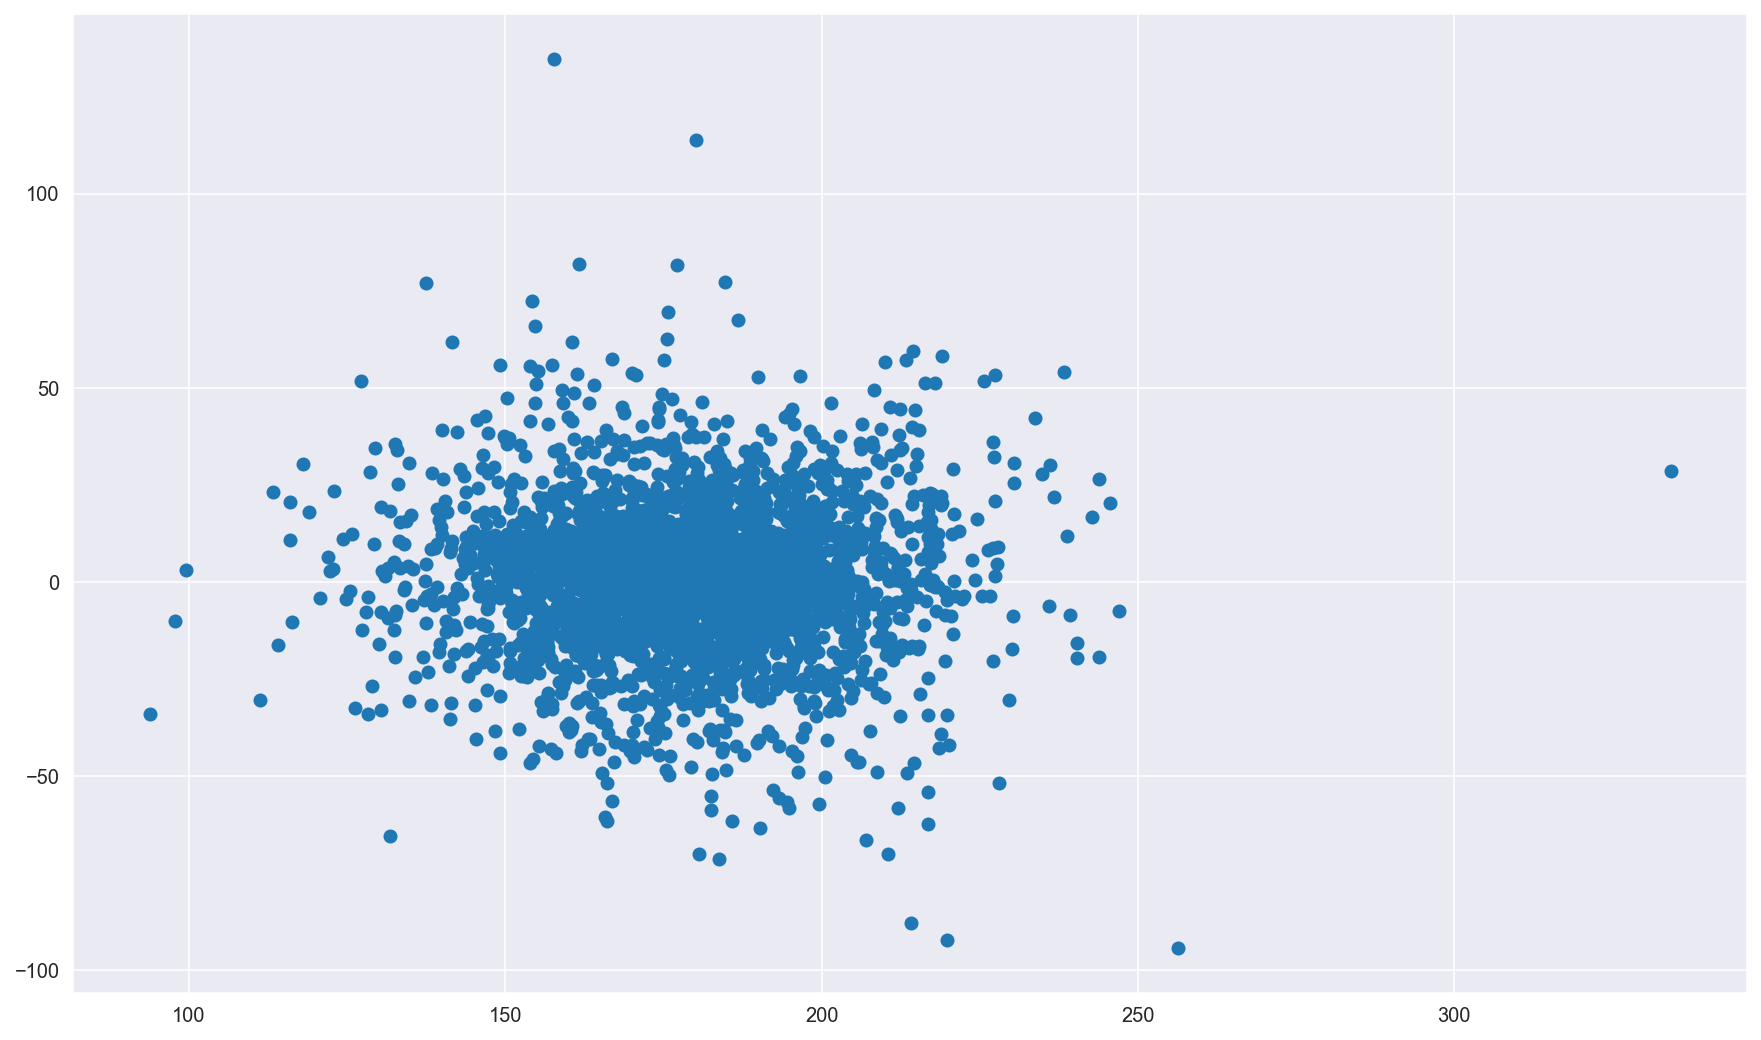

In [41]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid


plt.scatter(fitted_vals,resids)

In [43]:
resids_standardized = model.get_influence().resid_studentized_internal

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 0.8960658897545059), ('p-value', 0.9829808209580363)]

In [91]:
## p-value > 0.05, Null hypothesis is true. Thus variance of residuals are constant. Homoscedious.

In [92]:
## Base Model and Assumptions are done.

In [93]:
## EDA

In [94]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', 'binnedInc_avg'],
      dtype='object')

In [44]:
## Let's find out which columns have good correlation with the target variable.
df2 = pd.DataFrame(df1.corr()['TARGET_deathRate'])
df2[abs(df2['TARGET_deathRate'])>0.5]

,TARGET_deathRate
TARGET_deathRate,1.0


In [96]:
## From this we can see that there aren't any column which has good correlation with the Target column.

In [45]:
df1.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'binnedInc_avg'],
      dtype='object')

In [98]:
## Predict PctPrivateCoverageAlone, PctEmployed16_Over.
## feature selection.
## Transformation.
## model. Lasso Ridge.

In [46]:
df.shape

(3047, 32)

In [101]:
## Now let's take the columns PctPrivateCoverageAlone, PctEmployed16_Over. 

df3 = df.copy()

## We will make the null values as our unseen data. We will try to replace that with the best possible predicted values.
## But for this we will drop the other column which is having null values too.

df3['PctPrivateCoverageAlone'].fillna("Test", inplace = True)

df3_unseen = df3[df3['PctPrivateCoverageAlone']=='Test']
df3_modelling = df3[df3['PctPrivateCoverageAlone']!='Test']

df4_m = df3_modelling['PctEmployed16_Over']
df4_u = df3_unseen['PctEmployed16_Over']

df4 = pd.concat([df4_m,df4_u],0)

df3_unseen.dropna(axis=1,inplace = True)
df3_modelling.dropna(axis=1, inplace = True)

## Let's start with 'PctPrivateCoverageAlone'.

X = df3_modelling.drop('PctPrivateCoverageAlone', axis=1) #IV
y = df3_modelling['PctPrivateCoverageAlone'] #DV

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Base train score: ',model.score(X_train, y_train)*100)
print('Base test score: ', model.score(X_test, y_test)*100)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('PctPrivateCoverageAlone Predicting Rmse: ', rmse)

Base train score:  98.82364944584997
Base test score:  98.61856223541416
PctPrivateCoverageAlone Predicting Rmse:  1.1784046823961312


In [102]:
## We can esily see that whatever we are predicting is 98 % accurate. So, we can easily use this model to predict our model.

In [103]:
X = df3_unseen.drop('PctPrivateCoverageAlone', axis=1) #IV

y_pred = model.predict(X)
df3_unseen['PctPrivateCoverageAlone'] = y_pred

df3_unseen['PctPrivateCoverageAlone'].head()

0     54.684847
9     53.933565
10    44.253946
11    46.924395
23    54.799235
Name: PctPrivateCoverageAlone, dtype: float64

In [104]:
df3.shape

(3047, 32)

In [105]:
df3_new = pd.concat([df3_modelling,df3_unseen],0)
df3_new.shape

(3047, 31)

In [106]:
## Now we have df3 which has the value with null values for 'PctPrivateCoverageAlone' and df3_new which has values where null 
## values are replaced by predicted values.


## Now in this df3_new, we need to attach our 'PctEmployed16_Over' column which we dropped in df3.

df_new = pd.concat([df3_new, df4],1)

In [107]:
print(df_new.shape)
df_new.head(2)

(3047, 32)


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,binnedInc_avg,PctEmployed16_Over
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,49533.0,55.9
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,49533.0,45.9


In [108]:
## Now let's try to replace the null values of 'PctEmployed16_Over'.

df3 = df_new.copy()

df3['PctEmployed16_Over'].fillna("Test", inplace = True)

df3_unseen = df3[df3['PctEmployed16_Over']=='Test']
df3_modelling = df3[df3['PctEmployed16_Over']!='Test']

## Let's start with 'PctPrivateCoverageAlone'.

X = df3_modelling.drop('PctEmployed16_Over', axis=1) #IV
y = df3_modelling['PctEmployed16_Over'] #DV

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Base train score: ',model.score(X_train, y_train)*100)
print('Base test score: ', model.score(X_test, y_test)*100)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('PctEmployed16_Over Predicting Rmse: ', rmse)

Base train score:  85.46784248986832
Base test score:  84.94960706568948
PctEmployed16_Over Predicting Rmse:  3.261361560775694


In [109]:
## Now we are able to predict the null values for this column.

X = df3_unseen.drop('PctEmployed16_Over', axis=1) #IV

y_pred = model.predict(X)
df3_unseen['PctEmployed16_Over'] = y_pred

df3_unseen['PctEmployed16_Over'].head()

104    63.556212
105    47.234840
184    57.965284
272    55.316288
326    32.396626
Name: PctEmployed16_Over, dtype: float64

In [110]:
df3_new = pd.concat([df3_modelling,df3_unseen],0)
df3_new.shape

(3047, 32)

In [45]:
df3_new.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,binnedInc_avg,PctEmployed16_Over
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,49533.0,55.9
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,49533.0,45.9
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,43961.7,48.3
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,49533.0,48.2
5,428.0,152,176.0,505.4,52313,61023,15.6,180.259902,45.4,43.5,...,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476,52795.0,44.1


In [46]:
## After Predicting, Let's see what is the overall accuracy of my data.
X = df3_new.drop('TARGET_deathRate', axis=1) #IV
y = df3_new['TARGET_deathRate'] #DV

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Base train score: ',model.score(X_train, y_train)*100)
print('Base test score: ', model.score(X_test, y_test)*100)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Base Rmse: ', rmse)

Base train score:  54.45480690521283
Base test score:  46.40359046238848
Base Rmse:  19.86778076400189


In [47]:
## The scenario after predicting our null values is that we have an Overfit model.

## Let's try to solve this issue.

In [53]:
## Feature Selection Techniques.

## RFE

from sklearn.feature_selection import RFE


#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.382327


In [50]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['MedianAgeFemale', 'PercentMarried', 'PctBachDeg25_Over',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'PctEmployed16_Over'],
      dtype='object')


In [54]:
## We will use the features obtained from our RFE model to get the important features for our model building.

X = df3_new[['MedianAgeFemale', 'PercentMarried', 'PctBachDeg25_Over',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'PctEmployed16_Over']] #IV
y = df3_new['TARGET_deathRate'] #DV

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('train score: ',model.score(X_train, y_train)*100)
print('test score: ', model.score(X_test, y_test)*100)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Rmse: ', rmse)

train score:  40.258976710479146
test score:  33.52862723286643
Rmse:  22.125792465327546


In [64]:
df3_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 1 to 3007
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

In [116]:
## While replacing the null values with most closely predicted values, we made all the null values as 'TEST'. This made the 
## dtype of the features as object, we need to convert them back to float.

df3_new['PctEmployed16_Over'] = df3_new.PctEmployed16_Over.astype(float)
df3_new['PctPrivateCoverageAlone'] = df3_new.PctPrivateCoverageAlone.astype(float)

In [117]:
df3_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 1 to 3007
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

In [119]:
## Let's try backward elimination technique as well and see if we can make any progress or not.


X = df3_new.drop(['TARGET_deathRate'], axis = 1)
y = df3_new['TARGET_deathRate']
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                       4.370883e-29
avgAnnCount                 6.951855e-05
avgDeathsPerYear            1.059207e-05
incidenceRate              1.417340e-139
medIncome                   3.953841e-01
popEst2015                  4.997544e-03
povertyPercent              9.552924e-02
studyPerCap                 8.914006e-01
MedianAge                   8.089546e-01
MedianAgeMale               2.242082e-02
MedianAgeFemale             4.062208e-01
AvgHouseholdSize            3.585496e-01
PercentMarried              1.277497e-17
PctNoHS18_24                8.582819e-03
PctHS18_24                  3.438286e-05
PctBachDeg18_24             4.537152e-01
PctHS25_Over                7.257148e-06
PctBachDeg25_Over           1.393259e-12
PctUnemployed16_Over        8.164913e-01
PctPrivateCoverage          1.676224e-01
PctPrivateCoverageAlone     7.530674e-01
PctEmpPrivCoverage          1.200661e-03
PctPublicCoverage           1.439461e-01
PctPublicCoverageAlone      1.353976e-01
PctWhite        

In [120]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'PctEmployed16_Over']


In [121]:
## We will use the features obtained from our RFE model to get the important features for our model building.

X = df3_new[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 
             'PctNoHS18_24', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 
             'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 
             'PctEmployed16_Over']] #IV
y = df3_new['TARGET_deathRate'] #DV

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('train score: ',model.score(X_train, y_train)*100)
print('test score: ', model.score(X_test, y_test)*100)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Rmse: ', rmse)

train score:  54.30501585959744
test score:  46.83907591057236
Rmse:  19.786900566246246


In [122]:
## Let's try Vif technique.

### calculating the vif values as multicollinearity exists (as stated by warning 2)

X = df3_new.drop(['TARGET_deathRate'], axis = 1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[35.89350503782573,
 85.14700539701575,
 225.5471400953659,
 29.131705246559815,
 45.85463097568963,
 1.1388241944289352,
 2.052832909687107,
 563.4799413895065,
 679.3644701262249,
 46.19152980459789,
 638.4330248581207,
 9.781712325144062,
 25.68127226120702,
 5.586249064877729,
 94.23894381700595,
 39.73393153173606,
 15.720114441250484,
 2735.5247590684157,
 2463.1715086776517,
 236.97103586893417,
 1238.564627101992,
 465.5437446865854,
 184.5806968897796,
 7.0881913494597715,
 2.413591755063257,
 1.9220989467616612,
 535.9833900742723,
 10.851259132932714,
 69.63747115100902,
 211.22150812171213]

In [123]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [124]:
## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)

Iteration no.
1
[11.520670263642439, 35.89350503782573, 85.14700539701575, 225.5471400953659, 29.131705246559815, 45.85463097568963, 1.1388241944289352, 2.052832909687107, 563.4799413895065, 679.3644701262249, 46.19152980459789, 638.4330248581207, 9.781712325144062, 25.68127226120702, 5.586249064877729, 94.23894381700595, 39.73393153173606, 15.720114441250484, 2735.5247590684157, 2463.1715086776517, 236.97103586893417, 1238.564627101992, 465.5437446865854, 184.5806968897796, 7.0881913494597715, 2.413591755063257, 1.9220989467616612, 535.9833900742723, 10.851259132932714, 69.63747115100902, 211.22150812171213]
Max VIF is for variable no.:
18
Iteration no.
2
[11.520554724505713, 35.816855906093245, 84.2549756285948, 223.4072264094198, 29.019124195988844, 45.21119727955955, 1.1385216444067954, 2.0511753463822684, 560.2686504718971, 679.1643901773294, 46.1399483341027, 638.401833480649, 9.719969610398088, 25.68088828265857, 5.577843374647842, 93.61393446276817, 39.67146204023095, 15.693775

In [125]:
## includes only the relevant features.
train_out.head()

,popEst2015,studyPerCap,MedianAge,PctNoHS18_24,PctBachDeg18_24,PctBlack,PctAsian,PctOtherRace
1,43269,23.111234,33.0,6.1,7.5,0.969102,2.246233,3.741352
2,21026,47.560164,45.0,24.0,9.5,0.739673,0.465898,2.747358
3,75882,342.637253,42.8,20.2,2.5,0.782626,1.161359,1.362643
4,10321,0.000000,48.3,14.9,2.0,0.270192,0.665830,0.492135
5,61023,180.259902,45.4,29.9,4.5,1.653205,1.538057,3.314635


In [126]:
train_out.columns

Index(['popEst2015', 'studyPerCap', 'MedianAge', 'PctNoHS18_24',
       'PctBachDeg18_24', 'PctBlack', 'PctAsian', 'PctOtherRace'],
      dtype='object')

In [127]:
## We will use the features obtained from our vif model to get the important features for our model building.

X = df3_new[[ 'popEst2015', 'studyPerCap', 'MedianAge', 'PctNoHS18_24',
       'PctBachDeg18_24', 'PctBlack', 'PctAsian', 'PctOtherRace']] #IV
y = df3_new['TARGET_deathRate'] #DV

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('train score: ',model.score(X_train, y_train)*100)
print('test score: ', model.score(X_test, y_test)*100)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Rmse: ', rmse)

train score:  18.695923172379214
test score:  13.920477653975672
Rmse:  25.178591668208302


In [128]:
## Thus, even after removing m/c, we are unable to get a good rmse score.

In [129]:
## Let's try different set of modellings for same set of procedures.
## Like for vif only, we will make lasso and ridge both and check if we are able to get a good rmse score or not.

X = df3_new[[ 'popEst2015', 'studyPerCap', 'MedianAge', 'PctNoHS18_24',
       'PctBachDeg18_24', 'PctBlack', 'PctAsian', 'PctOtherRace']] #IV
y = df3_new['TARGET_deathRate'] #DV

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('train score: ',model.score(X_train, y_train)*100)
print('test score: ', model.score(X_test, y_test)*100)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Rmse: ', rmse)

train score:  18.695923172379214
test score:  13.920477653975672
Rmse:  25.178591668208302


In [163]:
# Ridge Regression with low alpha value

from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Rmse: ', rmse)

# Ridge Regression with high alpha value


rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
y_pred = rr100.predict(X_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Rmse100: ', rmse)

Rmse:  25.178591602998857
Rmse100:  25.177955636653575


In [134]:
print(Ridge_train_score)
print(Ridge_test_score)
print(Ridge_train_score100)
print(Ridge_train_score100)

0.1869592317237827
0.13920478099846312
0.1869582912321449
0.1869582912321449


In [137]:
## Let's try Lasso for the same

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)


train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

coeff_used = len(a)


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Rmse: ', rmse)

print(("training score:"), train_score) 
print(("test score: "), test_score)
print(("number of features used: "), coeff_used)

Rmse:  25.16892998559691
training score: 0.18657594775481226
test score:  0.13986526896751783
number of features used:  16


In [139]:
# fitting a lasso model
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
y_pred = lasso.predict(X_test)


# finding number of coef. used

a=[]
for i in lasso001.coef_ :
    if(i!=0):
        a.append(i)
print(a)
print('number of coef. used: ', len(a))


# checking the score of lasso model
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = len(a)


# printing the scores of lasso model

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Rmse for alpha=0.01 : ', rmse)

print(("training score for alpha=0.01:"), train_score001) 
print(("test score for alpha =0.01: "), test_score001)
print(("number of features used: for (alpha =0.01):"), coeff_used001)

[-7.244607943496971e-07, -0.0011231623335935864, -0.0018530999667213405, -0.1260340301536731, -1.505359679280507, 0.5028219831019722, -0.7276250652699854, -1.3835889736955682]
number of coef. used:  8
Rmse for alpha=0.01 :  25.16892998559691
training score for alpha=0.01: 0.18695919339462697
test score for alpha =0.01:  0.13921472588497752
number of features used: for (alpha =0.01): 8


In [140]:
# fitting a lasso model with different alpha value say 0.0001

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
y_pred = lasso00001.predict(X_test)

# finding number of coef. used
a=[]
for i in lasso00001.coef_ :
    if(i!=0):
        a.append(i)
print(a)
print('number of coef. used: ', len(a))


# Checking the score of lasso model 

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

# printing the score of lasso model

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Rmse for alpha=0.0001 : ', rmse)


print(("training score for alpha=0.0001:"), train_score00001)
print(("test score for alpha =0.0001: "), test_score00001)
print(("number of features used: for alpha =0.0001:"), coeff_used00001)

[-7.168473388354961e-07, -0.001123282697253191, -0.0018619041600081937, -0.1263502872803549, -1.5058638365468249, 0.5028696422024855, -0.7290101536440357, -1.3843011332956763]
number of coef. used:  8
Rmse for alpha=0.01 :  25.178590208335883
training score for alpha=0.0001: 0.18695923171995932
test score for alpha =0.0001:  0.1392048763587762
number of features used: for alpha =0.0001: 8


In [142]:
## Building a linear regression model out of the same dataset.

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print(("LR training score:"), lr_train_score )
print(("LR test score: "), lr_test_score)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Rmse : ', rmse)

LR training score: 0.18695923172379214
LR test score:  0.1392047765397567
Rmse :  25.178590208335883


In [162]:
## Let's try polynomial features.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('Rmse: ',rmse)
print('R2_score: ',r2)

Rmse:  24.48627064011984
R2_score:  0.22122039913939429


In [164]:
# We can  try gradient Descent regressor also. In order to check whether we are able to reduce the rmse or not.

from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

model = SGDRegressor(alpha=0.001,max_iter=30,)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Rmse: ',rmse)

Rmse:  5.435463881949925e+19
